# Experiments with different projections
----------------
This is amazing

In [1]:
### Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import math

In [2]:
### Bipartite projection

# Simple Weighted Projection
def simple_normalized_difference(x, y):
    if x==y:
        return 1
    return 1 / (1 + abs(x-y))

# Unweighted projection
def projections(bipartite_graph, mode="unweighted"):
    """Unweighted projection. The edges of the projected graphs don't have edges.
    
    mode = ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']
    """
    
    # Check if the bipartite_graph is bipartite.
    if not bipartite_graph.is_bipartite():
        raise TypeError("The graph is not bipartite.") 
    
    # Create empty graphs
    user_graph = ig.Graph()
    rsrs_graph = ig.Graph()
    
    # Add new attribute for the index
    bipartite_graph.vs["name"] = [u.index for u in bipartite_graph.vs]
    
    # Get two types of nodes
    user_nodes = [u["name"] for u in bipartite_graph.vs if u["type"] == 0]
    rsrs_nodes = [u["name"] for u in bipartite_graph.vs if u["type"] == 1]
    
    # Add nodes to the empty graphs
    user_graph.add_vertices(user_nodes)
    rsrs_graph.add_vertices(rsrs_nodes)    
    
    n_users = len(user_nodes) # Get the number of users
    
    # Add edges for user graph
    for u_user in range(len(user_nodes)):
        for v_user in range(u_user+1, len(user_nodes)):                
            # Calcular el número de recursos vecinos en común entre los nodos de usuario
            #print(u_user, v_user)
            common_neis = set(bipartite_graph.neighbors(u_user)).intersection(set(bipartite_graph.neighbors(v_user)))
            if len(common_neis) > 0: # If there are neis common nodes                
                if mode == 'unweighted':                
                    temp_weight = 1
                elif mode == 'simple':
                    temp_weight = len(common_neis)
                elif mode == 'neighborhood':
                    temp_weight = (len(common_neis)**2) / (bipartite_graph.degree(u_user)*bipartite_graph.degree(v_user))
                elif mode == 'resalloc':
                    sum_u, sum_v = 0, 0
                    for z_user in common_neis:
                        sum_u += bipartite_graph.es(bipartite_graph.get_eid(u_user, z_user))[0]["weight"] / (bipartite_graph.degree(u_user)*bipartite_graph.degree(z_user))
                        sum_v += bipartite_graph.es(bipartite_graph.get_eid(v_user, z_user))[0]["weight"] / (bipartite_graph.degree(v_user)*bipartite_graph.degree(z_user))
                    temp_weight = (sum_u+sum_v) / 2
                elif mode == 'resallocneis':
                    sum_u, sum_v = 0, 0
                    for z_user in common_neis:
                        snd = simple_normalized_difference(bipartite_graph.es(bipartite_graph.get_eid(u_user, z_user))[0]["weight"],
                                                           bipartite_graph.es(bipartite_graph.get_eid(v_user, z_user))[0]["weight"])
                        sum_u += snd / (bipartite_graph.degree(u_user)*bipartite_graph.degree(z_user))
                        sum_v += snd / (bipartite_graph.degree(v_user)*bipartite_graph.degree(z_user))
                    temp_weight = sum_u+sum_v
                temp_weight = round(temp_weight, 4)
                user_graph.add_edge(u_user, v_user, weight=temp_weight)

    for u_rsrs in range(len(rsrs_nodes)):
        for v_rsrs in range(u_rsrs+1, len(rsrs_nodes)):                    
            # Calcular el número de usuarios vecinos en común entre los nodos de recurso
            common_neis = set(bipartite_graph.neighbors(u_rsrs+n_users)).intersection(set(bipartite_graph.neighbors(v_rsrs+n_users)))            
            if len(common_neis) > 0: # If there are neis common nodes                            
                if mode == 'unweighted':                
                    temp_weight = 1
                elif mode == 'simple':
                    temp_weight = len(common_neis)
                elif mode == 'neighborhood':
                    temp_weight = (len(common_neis)**2) / (bipartite_graph.degree(u_rsrs+n_users)*bipartite_graph.degree(v_rsrs+n_users))
                elif mode == 'resalloc':
                    sum_u, sum_v = 0, 0
                    for z_rsrs in common_neis:
                        sum_u += bipartite_graph.es(bipartite_graph.get_eid(u_rsrs+n_users, z_rsrs))[0]["weight"] / (bipartite_graph.degree(u_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                        sum_v += bipartite_graph.es(bipartite_graph.get_eid(v_rsrs+n_users, z_rsrs))[0]["weight"] / (bipartite_graph.degree(v_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                    temp_weight = (sum_u+sum_v) / 2
                elif mode == 'resallocneis':
                    sum_u, sum_v = 0, 0
                    for z_rsrs in common_neis:
                        snd = simple_normalized_difference(bipartite_graph.es(bipartite_graph.get_eid(u_rsrs+n_users, z_rsrs))[0]["weight"],
                                                           bipartite_graph.es(bipartite_graph.get_eid(v_rsrs+n_users, z_rsrs))[0]["weight"])
                        sum_u += snd / (bipartite_graph.degree(u_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                        sum_v += snd / (bipartite_graph.degree(v_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                    temp_weight = sum_u+sum_v                
                temp_weight = round(temp_weight, 4)
                rsrs_graph.add_edge(u_rsrs, v_rsrs, weight=temp_weight)

    return user_graph, rsrs_graph

In [3]:
### Bipartite projection

# Simple Weighted Projection
def simple_normalized_difference(x, y):
    if x==y:
        return 1
    return 1 / (1 + abs(x-y))

# Unweighted projection
def projections_all_in_one(bipartite_graph):
    """Unweighted projection. The edges of the projected graphs don't have edges.
    
    mode = ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']
    """
    
    # Check if the bipartite_graph is bipartite.
    #if not bipartite_graph.is_bipartite():
    #    raise TypeError("The graph is not bipartite.") 
    
    # Create empty graphs
    user_graph_un = ig.Graph()
    rsrs_graph_un = ig.Graph()
    
    user_graph_sim = ig.Graph()
    rsrs_graph_sim = ig.Graph()
    
    user_graph_neis = ig.Graph()
    rsrs_graph_neis = ig.Graph()
    
    user_graph_res = ig.Graph()
    rsrs_graph_res = ig.Graph()
    
    user_graph_res2 = ig.Graph()
    rsrs_graph_res2 = ig.Graph()
    
    # Add new attribute for the index
    bipartite_graph.vs["name"] = [u.index for u in bipartite_graph.vs]
    
    # Get two types of nodes
    user_nodes = [u["name"] for u in bipartite_graph.vs if u["type"] == 0]
    rsrs_nodes = [u["name"] for u in bipartite_graph.vs if u["type"] == 1]
    
    # Add nodes to the empty graphs
    user_graph_un.add_vertices(user_nodes)
    rsrs_graph_un.add_vertices(rsrs_nodes)
    user_graph_sim.add_vertices(user_nodes)
    rsrs_graph_sim.add_vertices(rsrs_nodes)        
    user_graph_neis.add_vertices(user_nodes)
    rsrs_graph_neis.add_vertices(rsrs_nodes)    
    user_graph_res.add_vertices(user_nodes)
    rsrs_graph_res.add_vertices(rsrs_nodes)
    user_graph_res2.add_vertices(user_nodes)
    rsrs_graph_res2.add_vertices(rsrs_nodes)
    
    n_users = len(user_nodes) # Get the number of users
    
    # Add edges for user graph
    for u_user in range(len(user_nodes)):
        for v_user in range(u_user+1, len(user_nodes)):                
            # Calcular el número de recursos vecinos en común entre los nodos de usuario
            #print(u_user, v_user)
            common_neis = set(bipartite_graph.neighbors(u_user)).intersection(set(bipartite_graph.neighbors(v_user)))
            if len(common_neis) > 0: # If there are neis common nodes                
                
                #if mode == 'unweighted':                            
                temp_weight = 1                
                user_graph_un.add_edge(u_user, v_user, weight=temp_weight)
                
                #elif mode == 'simple':                    
                temp_weight = len(common_neis)
                user_graph_sim.add_edge(u_user, v_user, weight=temp_weight)                
                
                #elif mode == 'neighborhood':
                temp_weight = (len(common_neis)**2) / (bipartite_graph.degree(u_user)*bipartite_graph.degree(v_user))
                temp_weight = round(temp_weight, 4)
                user_graph_neis.add_edge(u_user, v_user, weight=temp_weight)
                
                #elif mode == 'resalloc':
                sum_u, sum_v = 0, 0
                for z_user in common_neis:
                    sum_u += bipartite_graph.es(bipartite_graph.get_eid(u_user, z_user))[0]["weight"] / (bipartite_graph.degree(u_user)*bipartite_graph.degree(z_user))
                    sum_v += bipartite_graph.es(bipartite_graph.get_eid(v_user, z_user))[0]["weight"] / (bipartite_graph.degree(v_user)*bipartite_graph.degree(z_user))
                temp_weight = (sum_u+sum_v) / 2
                temp_weight = round(temp_weight, 4)
                user_graph_res.add_edge(u_user, v_user, weight=temp_weight)
                
                #elif mode == 'resallocneis':
                sum_u, sum_v = 0, 0
                for z_user in common_neis:
                    snd = simple_normalized_difference(bipartite_graph.es(bipartite_graph.get_eid(u_user, z_user))[0]["weight"],
                                                       bipartite_graph.es(bipartite_graph.get_eid(v_user, z_user))[0]["weight"])
                    sum_u += snd / (bipartite_graph.degree(u_user)*bipartite_graph.degree(z_user))
                    sum_v += snd / (bipartite_graph.degree(v_user)*bipartite_graph.degree(z_user))
                temp_weight = sum_u+sum_v
                temp_weight = round(temp_weight, 4)
                user_graph_res2.add_edge(u_user, v_user, weight=temp_weight)

    for u_rsrs in range(len(rsrs_nodes)):
        for v_rsrs in range(u_rsrs+1, len(rsrs_nodes)):                    
            # Calcular el número de usuarios vecinos en común entre los nodos de recurso
            common_neis = set(bipartite_graph.neighbors(u_rsrs+n_users)).intersection(set(bipartite_graph.neighbors(v_rsrs+n_users)))            
            if len(common_neis) > 0: # If there are neis common nodes                            
                #if mode == 'unweighted':                
                temp_weight = 1                
                rsrs_graph_un.add_edge(u_rsrs, v_rsrs, weight=temp_weight)
                
                #elif mode == 'simple':
                temp_weight = len(common_neis)
                rsrs_graph_sim.add_edge(u_rsrs, v_rsrs, weight=temp_weight)
                
                #elif mode == 'neighborhood':
                temp_weight = (len(common_neis)**2) / (bipartite_graph.degree(u_rsrs+n_users)*bipartite_graph.degree(v_rsrs+n_users))
                temp_weight = round(temp_weight, 4)
                rsrs_graph_neis.add_edge(u_rsrs, v_rsrs, weight=temp_weight)
                
                #elif mode == 'resalloc':
                sum_u, sum_v = 0, 0
                for z_rsrs in common_neis:
                    sum_u += bipartite_graph.es(bipartite_graph.get_eid(u_rsrs+n_users, z_rsrs))[0]["weight"] / (bipartite_graph.degree(u_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                    sum_v += bipartite_graph.es(bipartite_graph.get_eid(v_rsrs+n_users, z_rsrs))[0]["weight"] / (bipartite_graph.degree(v_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                temp_weight = (sum_u+sum_v) / 2
                temp_weight = round(temp_weight, 4)
                rsrs_graph_res.add_edge(u_rsrs, v_rsrs, weight=temp_weight)
                
                #elif mode == 'resallocneis':
                sum_u, sum_v = 0, 0
                for z_rsrs in common_neis:
                    snd = simple_normalized_difference(bipartite_graph.es(bipartite_graph.get_eid(u_rsrs+n_users, z_rsrs))[0]["weight"],
                                                       bipartite_graph.es(bipartite_graph.get_eid(v_rsrs+n_users, z_rsrs))[0]["weight"])
                    sum_u += snd / (bipartite_graph.degree(u_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                    sum_v += snd / (bipartite_graph.degree(v_rsrs+n_users)*bipartite_graph.degree(z_rsrs))
                temp_weight = sum_u+sum_v                
                temp_weight = round(temp_weight, 4)
                rsrs_graph_res2.add_edge(u_rsrs, v_rsrs, weight=temp_weight)
    
    to_return = [user_graph_un, user_graph_sim,user_graph_neis,user_graph_res,user_graph_res2]
    to_return2 = [rsrs_graph_un, rsrs_graph_sim,rsrs_graph_neis,rsrs_graph_res,rsrs_graph_res2]
    return to_return, to_return2

In [2]:
### Toy example

toy_graph = ig.Graph()

# Add new nodes
toy_graph.add_vertices(12) # 8=users, 4=resources
toy_graph.vs['type'] = [0,0,0,0,0,0,0,0,1,1,1,1]
toy_graph.vs["name"] = [u.index for u in toy_graph.vs]

# Add edges
edge_list = [(0,8),
            (1,8), (1,9),
            (2,8), (2,9),
            (3,8), (3,9), (3,10), (3,11),
            (4,9), (4,10),
            (5,11),
            (6,11),
            (7,11)]
edge_weights = [0.11,0.03,0.05,0.08,0.2,0.03,0.1,0.06,0.05,0.05,0.08,0.08,0.03,0.1]
print("# Edges =",len(edge_list))
toy_graph.add_edges(edge_list)
toy_graph.es["weight"] = edge_weights
print(toy_graph.is_bipartite())

# Edges = 14
True


In [71]:
### Load network
filename = "../data/HC/binet-HC-Rw.gml"
bip_net = ig.read(filename)
print(bip_net.summary())

print(len(bip_net.vs.select(type=0)))
print(len(bip_net.vs.select(type=1)))

IGRAPH UNWT 2829 4171 -- 
+ attr: id (v), name (v), ranking (v), type (v), weight (e)
31
2798


In [10]:
# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']
projection_modes = ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']

user_projections = []
rsrs_projections = []

for mode_projs in projection_modes:
    user_net, rsrs_net = projections_all_in_one(toy_graph)
    user_projections.append(user_net)
    rsrs_projections.append(rsrs_net)
    print("Done -> ", mode_projs)
    #print(user_net)
    #print(list(user_net.vs()))
    #print(list(user_net.es()))

print("All Done!")
print(user_projection
    #print(rsrs_net)
    #print(list(rsrs_net.vs()))
    #print(list(rsrs_net.es()))

    # Writing graphs
    #user_net.write("toy-user_net-"+mode_projs+".gml")
    #rsrs_net.write("toy-rsrs_net-"+mode_projs+".gml")

Done ->  unweighted
Done ->  simple
Done ->  neighborhood
Done ->  resalloc
Done ->  resallocneis
All Done!


In [72]:
# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']

user_net, rsrs_net = projections_all_in_one(bip_net)
print(user_net)
print(rsrs_net)

print()
print(user_net[0].summary())
print(rsrs_net[0].summary())
print()
    
print("All Done!")

KeyboardInterrupt: 

In [ ]:
### Load network
filename = "../data/IoT/binet-IoT-Rw.gml"
bip_net2 = ig.read(filename)
print(bip_net2.summary())

print(len(bip_net2.vs.select(type=0)))
print(len(bip_net2.vs.select(type=1)))

# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']

user_net2, rsrs_net2 = projections_all_in_one(bip_net2)
print(user_net2)
print(rsrs_net2)

print()
print(user_net2[0].summary())
print(rsrs_net2[0].summary())
print()
    
print("All Done!")

In [19]:
### Load network
filename = "../data/HC/binet-HC-Rw.gml"
bip_net3 = ig.read(filename)
print(bip_net3.summary())

print(len(bip_net3.vs.select(type=0)))
print(len(bip_net3.vs.select(type=1)))

# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']

user_net3, rsrs_net3 = projections_all_in_one(bip_net3)
print(user_net3)
print(rsrs_net3)

print()
print(user_net3[0].summary())
print(rsrs_net3[0].summary())
print()
    
print("All Done!")

IGRAPH UNWT 2829 4171 -- 
+ attr: id (v), name (v), ranking (v), type (v), weight (e)
31
2798


KeyboardInterrupt: 

In [51]:

for i in range(len(user_net)):
    k = 10
    user_mod_counter = 0
    rsrs_mod_counter = 0
    for j in range(k):
        user_mod_counter += user_net[i].community_multilevel(weights=user_net[i].es["weight"]).modularity
        rsrs_mod_counter += rsrs_net[i].community_multilevel(weights=rsrs_net[i].es["weight"]).modularity
    print("Mode =", projection_modes[i])
    print("User Mod:", user_mod_counter/k)
    print("Rsrs Mod:", rsrs_mod_counter/k)

Mode = unweighted
User Mod: 0.6460303964289509
Rsrs Mod: 0.37110726643598607
Mode = simple
User Mod: 0.6533499999999999
Rsrs Mod: 0.36832598193656796
Mode = neighborhood
User Mod: 0.3888265426894213
Rsrs Mod: 0.44919786096256686
Mode = resalloc
User Mod: 0.5291331256148559
Rsrs Mod: 0.75
Mode = resallocneis
User Mod: 0.6526523070410908
Rsrs Mod: 0.468879945189113


In [4]:
def calculate_log_binning(degree_distribution, n_bins):
    """Compute the log-binning y-values in the degree distribution.

    Divides the degree distribution in `n_bins` segments.

    Parameters
    ----------
    degree_distribution: list
        Network degree distribution.
    n_bins:
        Number of bins to assign.

    Returns
    -------
    (list, list)
        The (x_values, y_values_log_bin_list) tuple.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degree_distribution[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degree_distribution):
            x_values.append(previous_k)
            temp_y_value = sum(
                degree_distribution[previous_k:len(degree_distribution)])
            temp_y_value = temp_y_value / (len(degree_distribution)-previous_k)
            y_values_log_bin_list.append(temp_y_value)
            break

    return x_values, y_values_log_bin_list

<Figure size 640x480 with 0 Axes>

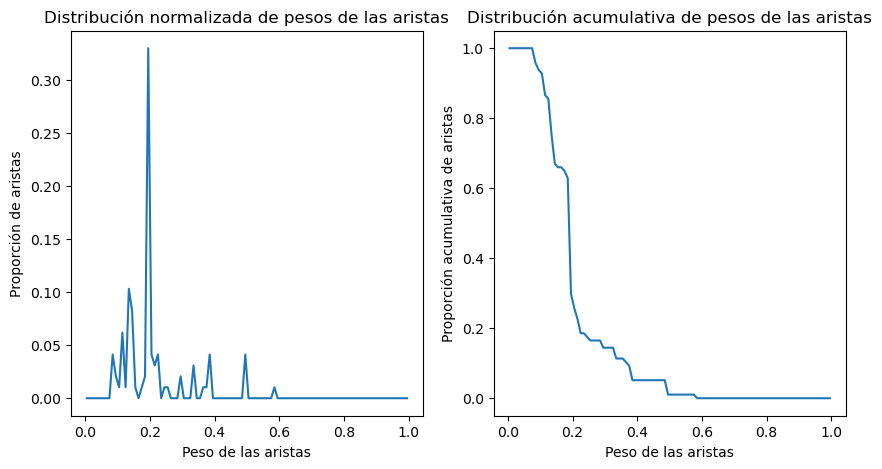

In [54]:
plt.clf()
fig = plt.figure(figsize=(10, 5))

# Obtener la lista de pesos de las aristas
pesos_aristas = user_net[4].es["weight"]
# Calcular el histograma de los pesos de las aristas
hist, bin_edges = np.histogram(pesos_aristas, bins=100, density=False, range=(0, 1))
# Calcular el número total de aristas en el grafo
num_total_aristas = len(pesos_aristas)
# Normalizar el histograma
hist_normalizado = hist / num_total_aristas
# Calcular los puntos medios de los intervalos de los bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Trazar la distribución de pesos de las aristas en log-log con una línea continua
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist_normalizado, linestyle='-')
# Configurar los ejes y etiquetas
plt.xlabel('Peso de las aristas')
plt.ylabel('Proporción de aristas')
plt.title('Distribución normalizada de pesos de las aristas')

# Calcular la distribución acumulativa de los pesos
dist_acumulativa = np.cumsum(hist)
# Normalizar la distribución acumulativa para obtener proporciones
dist_acumulativa_normalizada = dist_acumulativa / len(pesos_aristas)
# Calcular los puntos medios de los intervalos de los bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
# Trazar la distribución acumulativa de los pesos de las aristas
plt.subplot(1, 2, 2)
plt.plot(bin_centers, 1-dist_acumulativa_normalizada)
# Configurar los ejes y etiquetas
plt.xlabel('Peso de las aristas')
plt.ylabel('Proporción acumulativa de aristas')
plt.title('Distribución acumulativa de pesos de las aristas')


#plt.title('Distribución normalizada de pesos de las aristas (log-log)')

# Mostrar el gráfico
plt.show()


In [5]:
import networkx as nx

def get_edge_weight(i_node, j_node):
    """
    Compute the weight of an edge between i and j nodes.

    Args:
        i_node (networkX node): i node.
        j_node (networkX node): j node.

    Returns:
        weight (float): The weight between nodes.

    Raises:
        TypeError: if there are not an intersection
    """
    neighs_i = set(i_node.neighbors())  # Set of neighbors of i
    neighs_j = set(j_node.neighbors())  # Set of neighbors of j

    # Calculate intersection between two previous sets
    insersection_neighbors = neighs_i.intersection(neighs_j)

    weight = (len(insersection_neighbors)*len(insersection_neighbors)
              ) / (len(neighs_i)*len(neighs_j))

    return weight
# END get_edge_weight

def bipartite_projection(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        weight_ = get_edge_weight(Y_node_i, Y_node_j)
                        # print("Peso: ", Y_node_i['name'], "-", Y_node_j['name'], " => ", weight_)
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=weight_)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_res(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=0)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        weight_ = get_edge_weight(Y_node_i, Y_node_j)
                        # print("Peso: ", Y_node_i['name'], "-", Y_node_j['name'], " => ", weight_)
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=weight_)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection

In [12]:
### Load network
filename = "../data/HC/binet-HC-Rw.gml"
bip_net = ig.read(filename)
print(bip_net.summary())

print(len(bip_net.vs.select(type=0)))
print(len(bip_net.vs.select(type=1)))

IGRAPH UNWT 2829 4171 -- 
+ attr: id (v), name (v), ranking (v), type (v), weight (e)
31
2798


In [6]:
import networkx as nx

def get_edge_weight_resall(i_node, j_node):
    """
    Compute the weight of an edge between i and j nodes.

    Args:
        i_node (networkX node): i node.
        j_node (networkX node): j node.

    Returns:
        weight (float): The weight between nodes.

    Raises:
        TypeError: if there are not an intersection
    """
    neighs_i = set(i_node.neighbors())  # Set of neighbors of i
    neighs_j = set(j_node.neighbors())  # Set of neighbors of j

    # Calculate intersection between two previous sets
    insersection_neighbors = neighs_i.intersection(neighs_j)

    weight = (len(insersection_neighbors)*len(insersection_neighbors)
              ) / (len(neighs_i)*len(neighs_j))

    return weight
# END get_edge_weight

def bipartite_projection_resall(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        sum_u, sum_v = 0, 0
                        for z_user in common_neis:
                            #print(Y_node_i.index, z_user,Y_node_j.index)
                            sum_u += biparte_network.es(biparte_network.get_eid(Y_node_i.index, z_user))[0]["weight"] / (biparte_network.degree(Y_node_i.index)*biparte_network.degree(z_user))
                            sum_v += biparte_network.es(biparte_network.get_eid(Y_node_j.index, z_user))[0]["weight"] / (biparte_network.degree(Y_node_j.index)*biparte_network.degree(z_user))
                        temp_weight = (sum_u+sum_v) / 2
                        temp_weight = round(temp_weight, 4)                
                        
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=temp_weight)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_resallres(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=0)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        sum_u, sum_v = 0, 0                        
                        for z_user in common_neis:
                            
                            sum_u += biparte_network.es(biparte_network.get_eid(Y_node_i.index, z_user))[0]["weight"] / (biparte_network.degree(Y_node_i.index)*biparte_network.degree(z_user))
                            sum_v += biparte_network.es(biparte_network.get_eid(Y_node_j.index, z_user))[0]["weight"] / (biparte_network.degree(Y_node_j.index)*biparte_network.degree(z_user))
                        temp_weight = (sum_u+sum_v) / 2
                        temp_weight = round(temp_weight, 4)   
                                        
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=temp_weight)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection

In [129]:
# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']

user_net1 = bipartite_projection(bip_net)
rsrs_net1 = bipartite_projection_res(bip_net)
    
print("All Done!")

User Network builded!
IGRAPH UNW- 31 195 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 2798 555630 -- 
+ attr: name (v), rsrcs (v), weight (e)
All Done!


In [13]:
# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']

user_net2 = bipartite_projection_resall(bip_net)
rsrs_net2 = bipartite_projection_resallres(bip_net)
    
print("All Done!")

NameError: name 'bipartite_projection_resall' is not defined

In [7]:
# Simple Weighted Projection
def simple_normalized_difference(x, y):
    if x==y:
        return 1
    return 1 / (1 + abs(x-y))


def bipartite_projection_resall2(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        sum_u, sum_v = 0, 0
                        for z_user in common_neis:
                            snd = simple_normalized_difference(biparte_network.es(biparte_network.get_eid(Y_node_i.index, z_user))[0]["weight"],
                                                               biparte_network.es(biparte_network.get_eid(Y_node_j.index, z_user))[0]["weight"])
                            sum_u += snd / (biparte_network.degree(Y_node_i.index)*biparte_network.degree(z_user))
                            sum_v += snd / (biparte_network.degree(Y_node_j.index)*biparte_network.degree(z_user))
                        temp_weight = sum_u+sum_v
                        temp_weight = round(temp_weight, 4)                
                        
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=temp_weight)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_resallres2(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=0)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        sum_u, sum_v = 0, 0                        
                        for z_user in common_neis:
                            snd = simple_normalized_difference(biparte_network.es(biparte_network.get_eid(Y_node_i.index, z_user))[0]["weight"],
                                                               biparte_network.es(biparte_network.get_eid(Y_node_j.index, z_user))[0]["weight"])
                            sum_u += snd / (biparte_network.degree(Y_node_i.index)*biparte_network.degree(z_user))
                            sum_v += snd / (biparte_network.degree(Y_node_j.index)*biparte_network.degree(z_user))
                        temp_weight = sum_u+sum_v
                        temp_weight = round(temp_weight, 4)   
                                        
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=temp_weight)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection

In [8]:

def bipartite_projection_un(biparte_network):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):                                                                
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=1)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_res_un(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=0)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=1)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_sim(biparte_network):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=len(common_neis))

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_res_sim(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=0)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                    g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=len(common_neis))

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection

In [19]:
dataset = "AMZ"
filename = "../data/"+dataset+"/binet-"+dataset+"-Rw.gml"
bip_net = ig.read(filename)
print(bip_net.summary())

print(len(bip_net.vs.select(type=0)))
print(len(bip_net.vs.select(type=1)))

user_net1 = bipartite_projection_un(bip_net)
rsrs_net1 = bipartite_projection_res_un(bip_net)
user_net1.write(dataset+"-user-un.gml")
rsrs_net1.write(dataset+"-rsrs-un.gml")

IGRAPH UNWT 16213 30872 -- 
+ attr: id (v), name (v), ranking (v), type (v), weight (e)
8980
7233
User Network builded!
IGRAPH UNW- 9799 1195413 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 6803 62089 -- 
+ attr: name (v), rsrcs (v), weight (e)


In [26]:
# ['unweighted', 'simple', 'neighborhood', 'resalloc', 'resallocneis']
#bip_net = toy_graph
import networkx as nx
user_net1 = bipartite_projection_un(bip_net)
rsrs_net1 = bipartite_projection_res_un(bip_net)
user_net1.write("toy-user-un.gml")
rsrs_net1.write("toy-rsrs-un.gml")

user_net2 = bipartite_projection_sim(bip_net)
rsrs_net2 = bipartite_projection_res_sim(bip_net)
user_net2.write("toy-user-sim.gml")
rsrs_net2.write("toy-rsrs-sim.gml")

user_net3 = bipartite_projection(bip_net)
rsrs_net3 = bipartite_projection_res(bip_net)
user_net3.write("toy-user-neis.gml")
rsrs_net3.write("toy-rsrs-neis.gml")

user_net4 = bipartite_projection_resall(bip_net)
rsrs_net4 = bipartite_projection_resallres(bip_net)
user_net4.write("toy-user-res.gml")
rsrs_net4.write("toy-rsrs-res.gml")

user_net5 = bipartite_projection_resall2(bip_net)
rsrs_net5 = bipartite_projection_resallres2(bip_net)
user_net5.write("toy-user-res2.gml")
rsrs_net5.write("toy-rsrs-res2.gml")

print()
    
print("All Done!")

User Network builded!
IGRAPH UNW- 31 195 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 2798 555630 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 31 195 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 2798 555630 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 31 195 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 2798 555630 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 31 195 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 2798 555630 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 31 195 -- 
+ attr: name (v), rsrcs (v), weight (e)
User Network builded!
IGRAPH UNW- 2798 555630 -- 
+ attr: name (v), rsrcs (v), weight (e)

All Done!


In [172]:
k = 10
user_mod_counter = 0
rsrs_mod_counter = 0
to_graph_usr = user_net5
to_graph_res = rsrs_net1
for j in range(k):
    user_mod_counter += to_graph_usr.community_multilevel(weights=to_graph_usr.es["weight"]).modularity
    #rsrs_mod_counter += to_graph_res.community_multilevel(weights=to_graph_res.es["weight"]).modularity
print("User Mod:", user_mod_counter/k)
print("Rsrs Mod:", rsrs_mod_counter/k)

User Mod: 0.0
Rsrs Mod: 0.0


<Figure size 640x480 with 0 Axes>

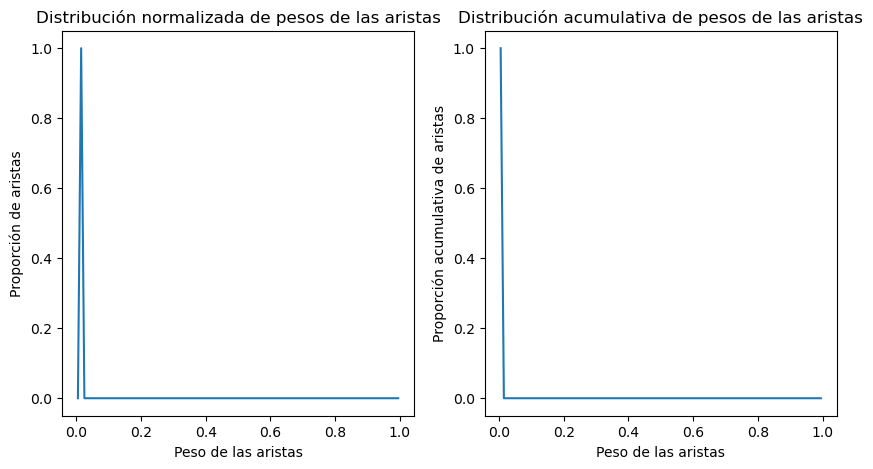

In [174]:
plt.clf()
fig = plt.figure(figsize=(10, 5))

# Obtener la lista de pesos de las aristas
pesos_aristas = user_net5.es["weight"]
# Calcular el histograma de los pesos de las aristas
hist, bin_edges = np.histogram(pesos_aristas, bins=100, density=False, range=(0, 1))
# Calcular el número total de aristas en el grafo
num_total_aristas = len(pesos_aristas)
# Normalizar el histograma
hist_normalizado = hist / num_total_aristas
# Calcular los puntos medios de los intervalos de los bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Trazar la distribución de pesos de las aristas en log-log con una línea continua
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist_normalizado, linestyle='-')
# Configurar los ejes y etiquetas
plt.xlabel('Peso de las aristas')
plt.ylabel('Proporción de aristas')
plt.title('Distribución normalizada de pesos de las aristas')

# Calcular la distribución acumulativa de los pesos
dist_acumulativa = np.cumsum(hist)
# Normalizar la distribución acumulativa para obtener proporciones
dist_acumulativa_normalizada = dist_acumulativa / len(pesos_aristas)
# Calcular los puntos medios de los intervalos de los bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
# Trazar la distribución acumulativa de los pesos de las aristas
plt.subplot(1, 2, 2)
plt.plot(bin_centers, 1-dist_acumulativa_normalizada)
# Configurar los ejes y etiquetas
plt.xlabel('Peso de las aristas')
plt.ylabel('Proporción acumulativa de aristas')
plt.title('Distribución acumulativa de pesos de las aristas')


#plt.title('Distribución normalizada de pesos de las aristas (log-log)')

# Mostrar el gráfico
plt.show()


In [9]:
def common_neighbors_weight(graph, node1, node2):
    """Calculate the weight based on common neighbors."""
    common_neis = set(graph.neighbors(node1)).intersection(set(graph.neighbors(node2)))
    if common_neis:
        return sum(1 / (1 + abs(graph.es[graph.get_eid(node1, z)][0]["weight"] - graph.es[graph.get_eid(node2, z)][0]["weight"])) 
                   for z in common_neis) / (graph.degree(node1) * graph.degree(node2))
    return 0

def weighted_projection(bipartite_graph, mode="unweighted"):
    """Weighted projection."""
    if not bipartite_graph.is_bipartite():
        raise TypeError("The graph is not bipartite.") 
    
    user_nodes = [v for v in bipartite_graph.vs if v["type"] == 0]
    rsrs_nodes = [v for v in bipartite_graph.vs if v["type"] == 1]
    user_graph = ig.Graph()
    rsrs_graph = ig.Graph()
    
    user_graph.add_vertices(user_nodes["name"])
    rsrs_graph.add_vertices(rsrs_nodes["name"])
    
    n_users = len(user_nodes)
    
    for u, v in combinations(user_nodes, 2):
        weight = common_neighbors_weight(bipartite_graph, u.index, v.index)
        if weight > 0:
            user_graph.add_edge(u.index, v.index, weight=weight)
    
    for u, v in combinations(rsrs_nodes, 2):
        weight = common_neighbors_weight(bipartite_graph, u.index, v.index)
        if weight > 0:
            rsrs_graph.add_edge(u.index, v.index, weight=weight)
    
    return user_graph, rsrs_graph


In [10]:
def common_neighbors_weight(graph, node1, node2, mode):
    """Calculate the weight based on common neighbors."""
    common_neis = set(graph.neighbors(node1)).intersection(set(graph.neighbors(node2)))
    if common_neis:
        if mode == 'unweighted':
            return 1
        elif mode == 'simple':
            return len(common_neis)
        elif mode == 'neighborhood':
            return (len(common_neis) ** 2) / (graph.degree(node1) * graph.degree(node2))
        elif mode == 'resalloc':
            sum_u, sum_v = 0, 0
            for z in common_neis:
                weight_u = graph.es[graph.get_eid(node1, z)][0]["weight"] / (graph.degree(node1) * graph.degree(z))
                weight_v = graph.es[graph.get_eid(node2, z)][0]["weight"] / (graph.degree(node2) * graph.degree(z))
                sum_u += weight_u
                sum_v += weight_v
            return (sum_u + sum_v) / 2
        elif mode == 'resallocneis':
            sum_u, sum_v = 0, 0
            for z in common_neis:
                weight_u = simple_normalized_difference(graph.es[graph.get_eid(node1, z)][0]["weight"],
                                                        graph.es[graph.get_eid(node2, z)][0]["weight"]) / (
                                  graph.degree(node1) * graph.degree(z))
                weight_v = simple_normalized_difference(graph.es[graph.get_eid(node1, z)][0]["weight"],
                                                        graph.es[graph.get_eid(node2, z)][0]["weight"]) / (
                                  graph.degree(node2) * graph.degree(z))
                sum_u += weight_u
                sum_v += weight_v
            return sum_u + sum_v
    return 0

def weighted_projection_all_in_one(bipartite_graph, modes):
    """Weighted projection."""
    user_nodes = [v for v in bipartite_graph.vs if v["type"] == 0]
    rsrs_nodes = [v for v in bipartite_graph.vs if v["type"] == 1]
    
    user_graphs = []
    rsrs_graphs = []
    
    for mode in modes:
        user_graph = ig.Graph()
        rsrs_graph = ig.Graph()
        
        user_graph.add_vertices([v["name"] for v in user_nodes])
        rsrs_graph.add_vertices([v["name"] for v in rsrs_nodes])
        
        for u, v in combinations(user_nodes, 2):
            weight = common_neighbors_weight(bipartite_graph, u.index, v.index, mode)
            if weight > 0:
                user_graph.add_edge(u.index, v.index, weight=weight)
        
        for u, v in combinations(rsrs_nodes, 2):
            weight = common_neighbors_weight(bipartite_graph, u.index + len(user_nodes), v.index + len(user_nodes), mode)
            if weight > 0:
                rsrs_graph.add_edge(u.index, v.index, weight=weight)
        
        user_graphs.append(user_graph)
        rsrs_graphs.append(rsrs_graph)
    
    return user_graphs, rsrs_graphs


In [11]:
# Simple Weighted Projection
def simple_normalized_difference(x, y):
    if x==y:
        return 1
    return 1 / (1 + abs(x-y))


def new_projection(biparte_network):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        sum_u, sum_v = 0, 0
                        for z_user in common_neis:
                            snd = simple_normalized_difference(biparte_network.es(biparte_network.get_eid(Y_node_i.index, z_user))[0]["weight"],
                                                               biparte_network.es(biparte_network.get_eid(Y_node_j.index, z_user))[0]["weight"])
                            sum_u += snd / (biparte_network.degree(Y_node_i.index)*biparte_network.degree(z_user))
                            sum_v += snd / (biparte_network.degree(Y_node_j.index)*biparte_network.degree(z_user))
                        temp_weight = sum_u+sum_v
                        temp_weight = round(temp_weight, 4)                
                        
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=temp_weight)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection


def bipartite_projection_resallres2(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    # Check if the bipartite network is a bipartite network:
    #if not biparte_network.is_bipartite():
    #    raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(type=0)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                        common_neis = set(biparte_network.neighbors(Y_node_i.index)).intersection(set(biparte_network.neighbors(Y_node_j.index)))
                        sum_u, sum_v = 0, 0                        
                        for z_user in common_neis:
                            snd = simple_normalized_difference(biparte_network.es(biparte_network.get_eid(Y_node_i.index, z_user))[0]["weight"],
                                                               biparte_network.es(biparte_network.get_eid(Y_node_j.index, z_user))[0]["weight"])
                            sum_u += snd / (biparte_network.degree(Y_node_i.index)*biparte_network.degree(z_user))
                            sum_v += snd / (biparte_network.degree(Y_node_j.index)*biparte_network.degree(z_user))
                        temp_weight = sum_u+sum_v
                        temp_weight = round(temp_weight, 4)   
                                        
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=temp_weight)

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]

    for u_nodes in g.vs:
        rsrcs = biparte_network.vs.find(name=u_nodes["name"]).neighbors()
        rsrcs = [r_node["name"] for r_node in rsrcs]
        u_nodes["rsrcs"] = rsrcs

    print("User Network builded!")
    print(g.summary())
    return g
# END bipartite_projection